# How to use PeakOnly in a Jupyter Notebook or general Python script

Install the `ms-peakonly` library in your environment, e.g. with 

    git clone git@github.com:soerendip/ms-peakonly.git
    cd ms-peakonly
    pip install -e .
    
then you should be able to import _PeakOnly_. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ms_peakonly import PeakOnly
from glob import glob
from pathlib import Path as P

## Get a list of files

In [3]:
fns = glob('/data/Metabolomics/MS-formats/MTBLS1569/mzML/*.mzML')[:2]
fns

['/data/Metabolomics/MS-formats/MTBLS1569/mzML/Control_3h_R2.mzML',
 '/data/Metabolomics/MS-formats/MTBLS1569/mzML/QC_3.mzML']

## Create a peakonly instance

In [4]:
PeakOnly?

Init signature:
PeakOnly(
    mz_deviation=0.01,
    min_roi_length=15,
    max_zeros=3,
    min_peak_length=8,
    model_dir=None,
)
Docstring:      <no docstring>
File:           ~/workspace/ms-peakonly/ms_peakonly/__init__.py
Type:           type
Subclasses:     


In [5]:
po = PeakOnly(model_dir='/home/swacker/.peak_only')

# Process all files with default parameters

In [6]:
table = po.process(fns)

Finding ROIs...


100%|██████████| 3831/3831 [00:28<00:00, 136.23it/s]


Aligning ROIs...
Finding peaks...


/home/swacker/.local/lib/python3.8/site-packages/torch/nn/functional.py:652: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool1d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/swacker/workspace/ms-peakonly/ms_peakonly/processing_utils/run_utils.py:32: RuntimeWarning: invalid value encountered in true_divide
  signal = torch.tensor(signal / np.max(signal), dtype=torch.float32, device=device)


total number of features: 380
zero filling...


100%|██████████| 2/2 [00:03<00:00,  1.68s/it]


## The output is a `pandas.DataFrame`

In [7]:
table

mz_mean    rt_min    rt_max  \
0      87.008711  0.311154  0.313969   
1      89.024270  0.149944  0.164925   
2      94.980561  0.447646  0.472093   
3      96.958868  0.301927  0.317091   
4      96.971704  0.226072  0.249500   
..           ...       ...       ...   
375   751.141891  0.255742  0.263471   
376   763.549978  0.053552  0.063208   
377  1078.583961  0.076131  0.077888   
378  1150.355437  0.251438  0.264092   
379  1151.358099  0.255654  0.263763   

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/Control_3h_R2.mzML  \
0                                         4.050207e+04                 
1                                         5.946541e+06                 
2                                         6.354852e+07                 
3                                         1.584294e+07                 
4                                         1.020892e+08                 
..                                                 ...                 
375                                       5.348547e+05                 
376                                       3.140993e+08                 
377                                       0.000000e+00                 
378                                       2.126982e+07                 
379                                       7.515564e+06                 

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/QC_3.mzML  
0                                         6.421246e+05       
1                                         2.078274e+07       
2                                         6.465936e+07       
3                                         6.580472e+07       
4                                         1.606559e+08       
..                                                 ...       
375                                       6.485756e+06       
376                                       3.317957e+08       
377                                       5.453032e+06       
378                                       4.830143e+07       
379                                       8.595165e+06       

[380 rows x 5 columns]

The unit of retention times that `PeakOpt` returns is _hours_.

<AxesSubplot:>

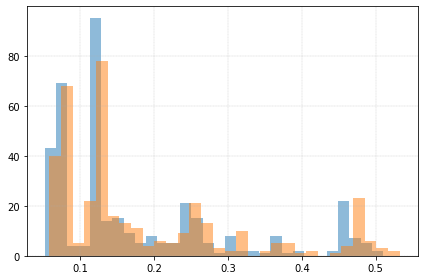

In [23]:
table.rt_min.hist(alpha=.5, bins=30)
table.rt_max.hist(alpha=.5, bins=30)

That corresponds to a 30 minutes long chromatographic run.

# Process with a different program for comparison and visualization

In [17]:
peaklist = po.as_peaklist()
peaklist

peak_label      mz_mean  mz_width         rt     rt_min     rt_max  \
0      87.009@18.75    87.008711        10  18.753693  18.669221  18.838164   
1       89.024@9.45    89.024270        10   9.446067   8.996664   9.895471   
2      94.981@27.59    94.980561        10  27.592176  26.858787  28.325564   
3      96.959@18.57    96.958868        10  18.570537  18.115619  19.025454   
4      96.972@14.27    96.971704        10  14.267152  13.564292  14.970013   
..              ...          ...       ...        ...        ...        ...   
375   751.142@15.58   751.141891        10  15.576390  15.344490  15.808289   
376      763.55@3.5   763.549978        10   3.502801   3.213096   3.792507   
377   1078.584@4.62  1078.583961        10   4.620566   4.567833   4.673300   
378  1150.355@15.47  1150.355437        10  15.465882  15.086251  15.845512   
379  1151.358@15.58  1151.358099        10  15.582508  15.339233  15.825782   

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/Control_3h_R2.mzML  \
0                                         4.050207e+04                 
1                                         5.946541e+06                 
2                                         6.354852e+07                 
3                                         1.584294e+07                 
4                                         1.020892e+08                 
..                                                 ...                 
375                                       5.348547e+05                 
376                                       3.140993e+08                 
377                                       0.000000e+00                 
378                                       2.126982e+07                 
379                                       7.515564e+06                 

     /data/Metabolomics/MS-formats/MTBLS1569/mzML/QC_3.mzML  
0                                         6.421246e+05       
1                                         2.078274e+07       
2                                         6.465936e+07       
3                                         6.580472e+07       
4                                         1.606559e+08       
..                                                 ...       
375                                       6.485756e+06       
376                                       3.317957e+08       
377                                       5.453032e+06       
378                                       4.830143e+07       
379                                       8.595165e+06       

[380 rows x 8 columns]

<AxesSubplot:>

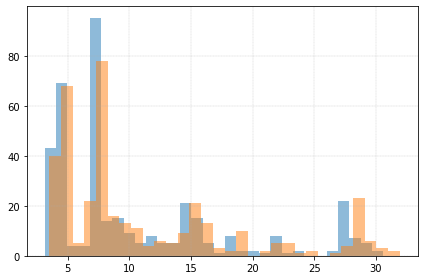

In [21]:
peaklist.rt_min.hist(alpha=.5, bins=30)
peaklist.rt_max.hist(alpha=.5, bins=30)

## Using the Metabolomics Integrator ([MINT](https://github.com/soerendip/ms-mint))

In [24]:
from ms_mint.notebook import Mint

In [25]:
mint = Mint()
mint.peaklist = po.as_peaklist()

In [26]:
mint.peaklist['rt_min'] = mint.peaklist['rt_min']
mint.peaklist['rt_max'] = mint.peaklist['rt_max']
mint.peaklist['mz_width'] = 10

In [27]:
mint.ms_files = fns

In [28]:
mint.progress_bar

IntProgress(value=0, bar_style='info', description='Progress:', layout=Layout(width='90%'))

In [29]:
mint.run()

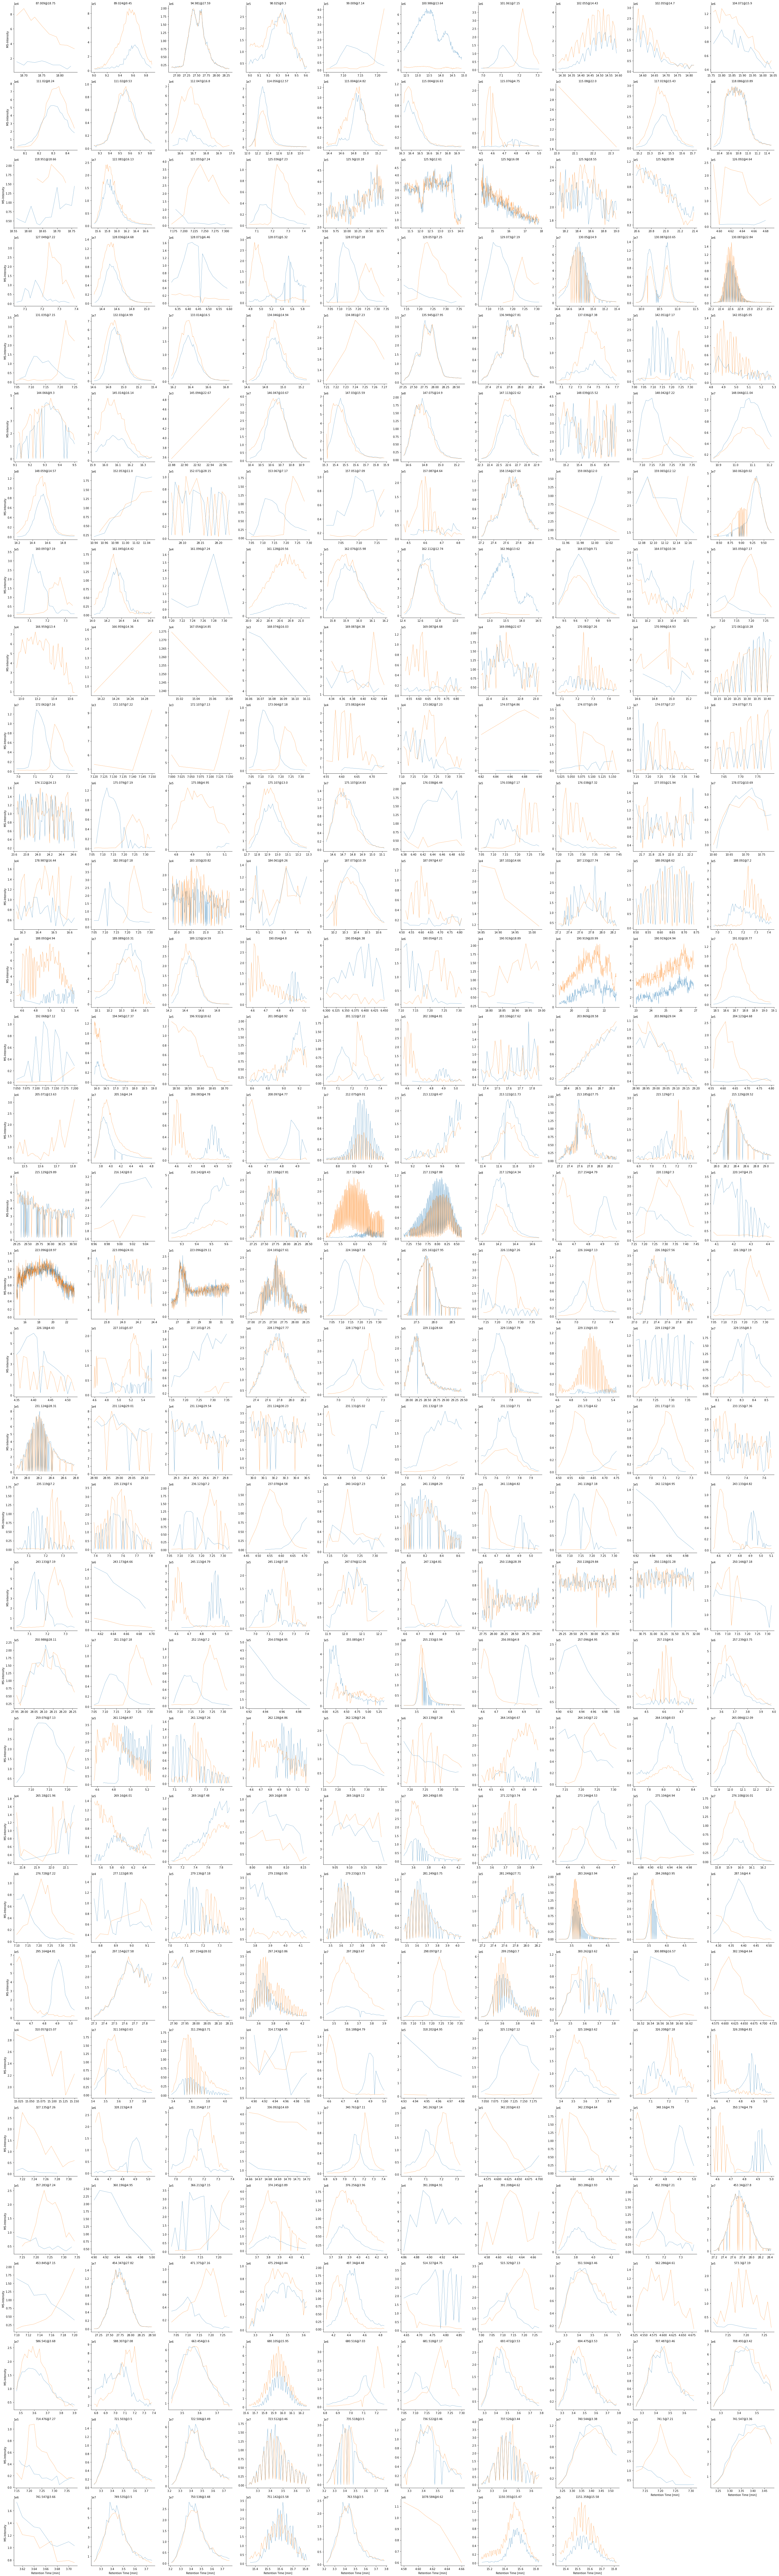

In [30]:
mint.plot_peak_shapes(col_wrap=10)

In [31]:
mint.results

ms_file      peak_label      mz_mean  mz_width         rt  \
0    Control_3h_R2.mzML    87.009@18.75    87.008711        10  18.753693   
1    Control_3h_R2.mzML     89.024@9.45    89.024270        10   9.446067   
2    Control_3h_R2.mzML    94.981@27.59    94.980561        10  27.592176   
3    Control_3h_R2.mzML    96.959@18.57    96.958868        10  18.570537   
4    Control_3h_R2.mzML    96.972@14.27    96.971704        10  14.267152   
..                  ...             ...          ...       ...        ...   
375           QC_3.mzML   751.142@15.58   751.141891        10  15.576390   
376           QC_3.mzML      763.55@3.5   763.549978        10   3.502801   
377           QC_3.mzML   1078.584@4.62  1078.583961        10   4.620566   
378           QC_3.mzML  1150.355@15.47  1150.355437        10  15.465882   
379           QC_3.mzML  1151.358@15.58  1151.358099        10  15.582508   

        rt_min     rt_max  intensity_threshold peaklist_name     peak_area  \
0    18.669221  18.838164                    0       unknown  1.250178e+05   
1     8.996664   9.895471                    0       unknown  6.934607e+06   
2    26.858787  28.325564                    0       unknown  6.491776e+07   
3    18.115619  19.025454                    0       unknown  0.000000e+00   
4    13.564292  14.970013                    0       unknown  0.000000e+00   
..         ...        ...                  ...           ...           ...   
375  15.344490  15.808289                    0       unknown  6.394646e+06   
376   3.213096   3.792507                    0       unknown  3.365009e+08   
377   4.567833   4.673300                    0       unknown  5.470771e+06   
378  15.086251  15.845512                    0       unknown  4.796436e+07   
379  15.339233  15.825782                    0       unknown  1.460733e+07   

     ...  peak_delta_int                                      peak_shape_rt  \
0    ...     6008.728516  18.68,18.7,18.71,18.73,18.75,18.76,18.78,18.8,...   
1    ...    11582.705078  9.01,9.03,9.04,9.06,9.08,9.09,9.11,9.13,9.14,9...   
2    ...    23021.062500  26.88,26.89,26.91,26.93,26.94,26.96,26.98,27.0...   
3    ...             NaN                                                      
4    ...             NaN                                                      
..   ...             ...                                                ...   
375  ...     1366.507812  15.35,15.36,15.37,15.38,15.39,15.4,15.41,15.42...   
376  ...   747287.187500  3.23,3.24,3.26,3.27,3.29,3.31,3.32,3.34,3.35,3...   
377  ...   539501.187500                       4.58,4.6,4.61,4.63,4.65,4.66   
378  ...     3878.937500  15.09,15.1,15.11,15.12,15.13,15.14,15.15,15.16...   
379  ...    81198.386719  15.35,15.36,15.37,15.38,15.39,15.4,15.41,15.42...   

                                        peak_shape_int  peak_mass_diff_25pc  \
0    15440,10710,15751,14317,16601,15274,11142,1091...             1.201875   
1    25356,22629,22254,22299,29903,25263,33667,3970...             1.061226   
2    171389,193811,187909,175319,165009,158152,2068...             0.390233   
3                                                                       NaN   
4                                                                       NaN   
..                                                 ...                  ...   
375  30345,26738,42677,29267,49602,66152,40020,5236...            -5.564938   
376  741386,1755391,2852909,4569965,6082861,8176092...            -0.386735   
377       1138597,1070483,1017466,927834,717292,599096             1.662301   
378  86822,141980,92815,144715,196874,129484,222458...            -4.005204   
379  126252,104422,144924,120772,184747,248993,1686...            -3.980737   

     peak_mass_diff_50pc  peak_mass_diff_75pc  peak_score total_intensity  \
0               1.596460             2.012965    0.286928    2.649655e+11   
1               1.446877             1.532577    0.718206    2.649655e+11   
2               0.550885 

# Merge and compare results

In [32]:
dfpo = po.as_peaklist().melt(id_vars=['peak_label', 'mz_mean', 'mz_width', 'rt_min', 'rt_max', 'rt'], var_name='ms_file', value_name='PeakOnly')
dfpo

peak_label      mz_mean  mz_width     rt_min     rt_max         rt  \
0      87.009@18.75    87.008711        10  18.669221  18.838164  18.753693   
1       89.024@9.45    89.024270        10   8.996664   9.895471   9.446067   
2      94.981@27.59    94.980561        10  26.858787  28.325564  27.592176   
3      96.959@18.57    96.958868        10  18.115619  19.025454  18.570537   
4      96.972@14.27    96.971704        10  13.564292  14.970013  14.267152   
..              ...          ...       ...        ...        ...        ...   
755   751.142@15.58   751.141891        10  15.344490  15.808289  15.576390   
756      763.55@3.5   763.549978        10   3.213096   3.792507   3.502801   
757   1078.584@4.62  1078.583961        10   4.567833   4.673300   4.620566   
758  1150.355@15.47  1150.355437        10  15.086251  15.845512  15.465882   
759  1151.358@15.58  1151.358099        10  15.339233  15.825782  15.582508   

                                               ms_file      PeakOnly  
0    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  4.050207e+04  
1    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  5.946541e+06  
2    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  6.354852e+07  
3    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  1.584294e+07  
4    /data/Metabolomics/MS-formats/MTBLS1569/mzML/C...  1.020892e+08  
..                                                 ...           ...  
755  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  6.485756e+06  
756  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  3.317957e+08  
757  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  5.453032e+06  
758  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  4.830143e+07  
759  /data/Metabolomics/MS-formats/MTBLS1569/mzML/Q...  8.595165e+06  

[760 rows x 8 columns]

In [33]:
dfpo['ms_file'] = dfpo.ms_file.apply(lambda x: P(x).name)

In [34]:
dfpo

peak_label      mz_mean  mz_width     rt_min     rt_max         rt  \
0      87.009@18.75    87.008711        10  18.669221  18.838164  18.753693   
1       89.024@9.45    89.024270        10   8.996664   9.895471   9.446067   
2      94.981@27.59    94.980561        10  26.858787  28.325564  27.592176   
3      96.959@18.57    96.958868        10  18.115619  19.025454  18.570537   
4      96.972@14.27    96.971704        10  13.564292  14.970013  14.267152   
..              ...          ...       ...        ...        ...        ...   
755   751.142@15.58   751.141891        10  15.344490  15.808289  15.576390   
756      763.55@3.5   763.549978        10   3.213096   3.792507   3.502801   
757   1078.584@4.62  1078.583961        10   4.567833   4.673300   4.620566   
758  1150.355@15.47  1150.355437        10  15.086251  15.845512  15.465882   
759  1151.358@15.58  1151.358099        10  15.339233  15.825782  15.582508   

                ms_file      PeakOnly  
0    Control_3h_R2.mzML  4.050207e+04  
1    Control_3h_R2.mzML  5.946541e+06  
2    Control_3h_R2.mzML  6.354852e+07  
3    Control_3h_R2.mzML  1.584294e+07  
4    Control_3h_R2.mzML  1.020892e+08  
..                  ...           ...  
755           QC_3.mzML  6.485756e+06  
756           QC_3.mzML  3.317957e+08  
757           QC_3.mzML  5.453032e+06  
758           QC_3.mzML  4.830143e+07  
759           QC_3.mzML  8.595165e+06  

[760 rows x 8 columns]

In [35]:
dfmint = mint.results.copy()

## Plot PeakOnly values vs MINT values

In [36]:
import pandas as pd

In [37]:
df = pd.merge(dfmint, dfpo[['peak_label', 'ms_file', 'PeakOnly']], on=['peak_label', 'ms_file'])

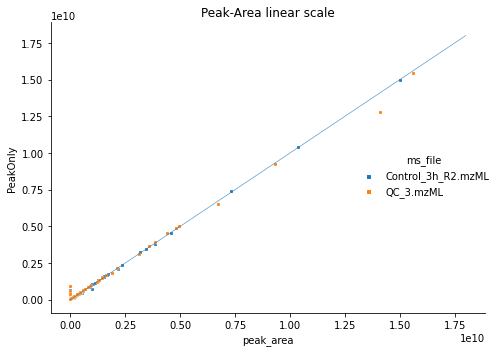

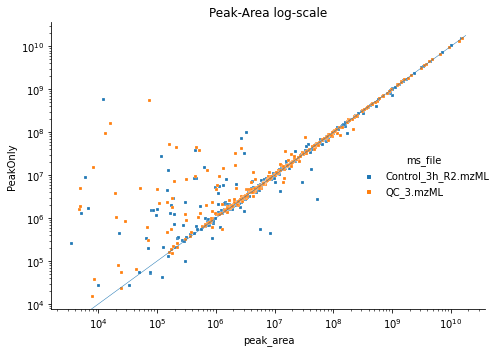

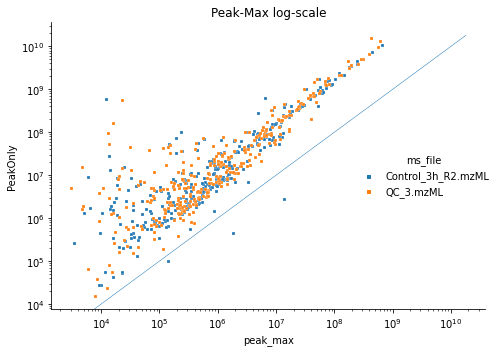

In [38]:
import seaborn as sns
g = sns.relplot(data=df, x='peak_area', y='PeakOnly', hue='ms_file')
title('Peak-Area linear scale')
plot([0,1.8e10], [0,1.8e10])
show()

g = sns.relplot(data=df, x='peak_area', y='PeakOnly', hue='ms_file')
g.set(xscale='log', yscale='log')
title('Peak-Area log-scale')
plot([0,1.8e10], [0,1.8e10])
show()

g = sns.relplot(data=df, x='peak_max', y='PeakOnly', hue='ms_file')
g.set(xscale='log', yscale='log')
plot([0,1.8e10], [0,1.8e10])
title('Peak-Max log-scale')
show()

The values that PeakOnly extracts are the areas under the peak or the summed up intensities. However, in some cases the values are different from the MINT values.

## Percentage Error

In [39]:
df['percentage_error'] = 100 * (df.peak_area - df.PeakOnly) / (df[['peak_area', 'PeakOnly']].max(axis=1)+1)

Text(0.5, 0, 'Percentage Error [%]')

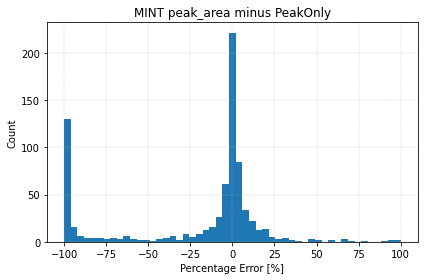

In [40]:
df.percentage_error.hist(bins=51, range=(-100, 100))
title('MINT peak_area minus PeakOnly')
ylabel('Count')
xlabel('Percentage Error [%]')

In [41]:
df = df.sort_values('percentage_error')

In [42]:
df

ms_file     peak_label     mz_mean  mz_width         rt  \
591           QC_3.mzML  227.172@27.86  227.172184        10  27.864462   
211  Control_3h_R2.mzML  227.172@27.86  227.172184        10  27.864462   
62   Control_3h_R2.mzML  145.056@14.88  145.056054        10  14.878637   
442           QC_3.mzML  145.056@14.88  145.056054        10  14.878637   
60   Control_3h_R2.mzML  144.979@13.45  144.978874        10  13.447180   
..                  ...            ...         ...       ...        ...   
375  Control_3h_R2.mzML  751.142@15.58  751.141891        10  15.576390   
324  Control_3h_R2.mzML  336.092@14.69  336.091527        10  14.691223   
75   Control_3h_R2.mzML   152.053@11.0  152.052696        10  10.995313   
641           QC_3.mzML   254.078@4.95  254.078387        10   4.953981   
158  Control_3h_R2.mzML  190.919@18.89  190.919210        10  18.887468   

        rt_min     rt_max  intensity_threshold peaklist_name     peak_area  \
591  27.049810  28.679114                    0       unknown  0.000000e+00   
211  27.049810  28.679114                    0       unknown  0.000000e+00   
62   14.667036  15.090237                    0       unknown  0.000000e+00   
442  14.667036  15.090237                    0       unknown  0.000000e+00   
60   11.884719  15.009640                    0       unknown  0.000000e+00   
..         ...        ...                  ...           ...           ...   
375  15.344490  15.808289                    0       unknown  5.835050e+06   
324  14.652330  14.730116                    0       unknown  5.334918e+07   
75   10.929182  11.061444                    0       unknown  8.627272e+06   
641   4.904886   5.003076                    0       unknown  4.428174e+03   
158  18.768049  19.006887                    0       unknown  1.333805e+04   

     ...                                     peak_shape_int  \
591  ...                                                      
211  ...                                                      
62   ...                                                      
442  ...                                                      
60   ...                                                      
..   ...                                                ...   
375  ...  6651,4744,6470,8278,9341,15703,21905,48620,287...   
324  ...          14245379,10899380,9755335,9869436,8579651   
75   ...  203751,300373,598015,919873,1075552,1872561,18...   
641  ...                                               4428   
158  ...                                3426,2981,3659,3270   

     peak_mass_diff_25pc  peak_mass_diff_50pc  peak_mass_diff_75pc  \
591                  NaN                  NaN                  NaN   
211                  NaN                  NaN                  NaN   
62                   NaN                  NaN                  NaN   
442                  NaN                  NaN                  NaN   
60                   NaN                  NaN                  NaN   
..                   ...                  ...                  ...   
375            -5.341482            -0.303580             5.465631   
324             7.250603             7.341404             7.432206   
75              8.957775             9.083215             9.183567   
641             1.790496             1.790496             1.790496   
158            -2.625190            -2.305499            -0.467275   

     peak_score  total_intensity  \
591         NaN     2.954080e+11   
211         NaN     2.649655e+11   
62          NaN     2.649655e+11   
442         NaN     2.954080e+11   
60          NaN     2.649655e+11   
..          ...              ...   
375    0.864541     2.649655e+11   
324    0.143345     2.649655e+11   
75     0.044520     2.649655e+11   
641    0.049078     2.954080e+11   
158    0.186378     2.649655e+11   

                                          ms_path ms_file_size      PeakOnly  \
591  /data/Metabolomics/MS-formats/MTBLS1569/mzML    41.709721  8.7

The percentage error is centered around zero. The differences are most likely due to differences in the peak-width. For MINT a peak-width of 50ppm of the ion mass was used. 